# K-Nearest Neighbors

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('trees.csv')

Visualizamos parte del conjunto de datos.

In [3]:
df.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [4]:
df.describe()

,Girth,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


In [5]:
df.shape

(31, 3)

Definimos a las variables **Girth** y **Height** como **independientes** y a la variable
**Volume** como **dependiente**. La elección la realizamos de esta forma porque es más sencillo
medir la altura y el diámetro a la altura del pecho, que medir el volúmen de los árboles (estuve
leyendo un poco al respecto, y para calcular el volumen sin necesidad de talar el árbol se
necesitan algunas técnicas complicadas y muy tardadas). Por lo que, es útil poder predecir el
volumen del árbol a partir de la altura y el diámetro dados.


Luego, preprocesamos nuestros datos (los normalizamos) y dividimos el conjunto en prueba-entrenamiento.

In [27]:
X = df[['Girth', 'Height']] # Seleccionamos las columnas Girth y Height
y = df['Volume'] # Seleccionamos la columna Volume

In [39]:
# Dividimos nuestro conjunto en entrenamiento y prueba.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Para que funcionen mejor muchos algoritmos de Machine Learning hay que normalizar las variables de entrada al algoritmo. Normalizar significa, en este caso, comprimir o extender los valores de la variable para que estén en un rango definido.

El escalador **MinMaxScaler** transforma las características escalándolas a un rango dado, por defecto (0,1), aunque puede ser personalizado. Este tipo de escalado suele denominarse frecuentemente "normalización" de los datos.

In [40]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

Para elegir el valor óptimo de **k** podemos utilizar la tasa de error obtenida sobre el conjunto de prueba, para así elegir aquella donde encontremos el valor más pequeño. Para esto aplicaremos el algoritmo probando varios valores de k y en función de ello determinaremos aquella que minimice el error en el conjunto de prueba.

In [41]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  # fit the model
    pred=model.predict(X_test) # make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) # calculate RMSE (Residuals Mean Squared Error)
    rmse_val.append(error) #store RMSE 
    print('RMSE value for k=' , K , 'is:', error)

RMSE value for k= 1 is: 14.894917637522251
RMSE value for k= 2 is: 7.986394680955854
RMSE value for k= 3 is: 4.85397889479457
RMSE value for k= 4 is: 2.9379596904752017
RMSE value for k= 5 is: 4.488410472698389
RMSE value for k= 6 is: 6.071367880182187
RMSE value for k= 7 is: 6.979192314618611
RMSE value for k= 8 is: 7.804884860045754
RMSE value for k= 9 is: 8.209328156619684
RMSE value for k= 10 is: 9.699529443667432


<AxesSubplot:>

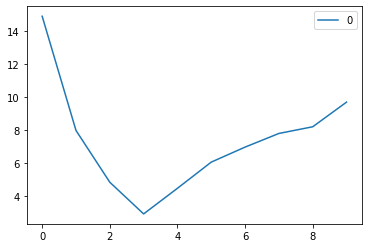

In [42]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

En la gráfica podemos apreciar que el valor $k=3$ es el que minimiza el error en el conjunto de prueba, así que aplicaremos el algoritmo con este valor de $k$.

In [49]:
# Creamos el modelo con k=3.
knn = KNeighborsRegressor(n_neighbors = 3)
# Entrenamos el modelo.
knn.fit(X_train, y_train)


print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.92


In [50]:
# Realizamos predicciones sobre el conjunto de prueba.
y_pred = knn.predict(X_test)

In [51]:
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

dfp

,Actual,Predicted
2,10.2,12.066667
29,51.0,61.400000
13,21.3,21.433333
10,24.2,26.966667
27,58.3,61.400000
25,55.4,61.400000
22,36.3,36.266667


In [47]:
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_pred))
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error: 3.47
Mean squared error: 23.56
Root Mean Squared Error: 4.85
Variance score: 0.92


Notemos que el puntaje de varianza es bastante bueno, lo cual nos indica que el modelo puede realizar predicciones razonablemente buenas.